# 课程难度评价模型
## 要点
1. 标准化成绩
2. 计算信度
3. 做出趋势  

本篇代码中使用特定某一门科目，实际是可变的，输入不同的科目可以分析出不同的趋势  
可变的部分进行注释，实际使用固定的科目

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
from scipy import stats


In [17]:
dataToDeal = pd.read_csv('bks_cjxx_out_true.csv',skiprows=0)
dA = dataToDeal
# print(dA)
dataAfterDeal = dA[['xh','ksrq','kch','kccj']]
courseNeedToAnalysis = 1110020010 #课程号可以修改成别的课程
dataAfterDeal = dataAfterDeal[dataAfterDeal['kch'].isin([str(courseNeedToAnalysis)])]
dataAfterDeal = dA[['xh','ksrq','kccj']]
dataAfterDeal = dataAfterDeal.sort_values(by='ksrq',ascending=True)
dBtemp = dataAfterDeal
print(dBtemp.drop_duplicates('ksrq'))
dataAfterDeal = dataAfterDeal.values


                xh       ksrq   kccj
294575   201424055     180701   70.0
1319456  201405067     180729   60.0
1835058  201650028     190113   65.0
825816   201740018     190119   89.0
1788503  201424146    2019113   78.0
861239   201514116   20090113   60.0
187230   299619221   20100626   79.0
682587   208815061   20120328   60.0
805975   220920110   20130530   60.0
1147668  201422064   20140101   88.0
1006518  201403087   20140107   82.0
325365   201412079   20140917   86.0
289756   201452061   20140930   63.0
769810   201492054   20141215   70.0
1055713  201492069   20141216  100.0
1436400  201484116   20141220  412.0
344997   201403056   20141229   85.0
293724   201452097   20141230   33.0
1308005  201412137   20150105   84.0
79702    201423075   20150107   72.0
916462   201433037   20150108   87.0
540413   201453004   20150112   80.0
924505   201453072   20150113   93.0
349424   201512062   20150117   82.0
343076   201461111   20150118   61.0
805640   201429065   20150119   80.0
8

In [35]:
# 分类搜集各个年份的数据
# print(dataAfterDeal)
grades=[[],[],[],[],[],[],[],[],[],[],[]]
for row in dataAfterDeal:
    if row[1] >= 200000 and row[1] <= 300000 and row[2] <= 100:
        grades[int(row[1]/1000)-2009].append(row[2])
    elif row[1] >= 20000000 and row[1] <= 30000000 and row[2] <= 100:
        grades[int(row[1]/10000)-2009].append(row[2])
    elif row[1] >= 100000 and row[1] <= 200000 and row[2] <= 100:
        grades[int(row[1]/10000)+2000-2009].append(row[2])
print(grades)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [46]:
#计算出平均成绩,以及与对应的高斯分布的协方差，平均成绩的变化反映难度的变化，协方差的变化反映信度的变化
averageGrades = [0,0,0,0,0,0,0,0,0,0,0]
pNormalGrades = [0,0,0,0,0,0,0,0,0,0,0]
i = 0
for temp in grades:
    if(len(temp)!=0):
        averageGrades[i] = sum(temp)/float(len(temp))
        if(len(temp)>=3):
            pNormalGrades[i] = stats.normaltest(temp)
            print(pNormalGrades[i])
            print()
    i += 1
print(averageGrades)
print(pNormalGrades)


NormaltestResult(statistic=2710.765249185946, pvalue=0.0)

NormaltestResult(statistic=79590.62231311583, pvalue=0.0)

NormaltestResult(statistic=147227.40358196473, pvalue=0.0)

NormaltestResult(statistic=205750.268956915, pvalue=0.0)

NormaltestResult(statistic=225717.46489157618, pvalue=0.0)

NormaltestResult(statistic=115898.93713501381, pvalue=0.0)

[60.0, 79.0, 0, 60.0, 60.0, 80.40045766590389, 76.00166084228856, 75.28939167242933, 75.4027730287259, 74.73782880173066, 75.33123700446535]
[0, 0, 0, 0, 0, NormaltestResult(statistic=2710.765249185946, pvalue=0.0), NormaltestResult(statistic=79590.62231311583, pvalue=0.0), NormaltestResult(statistic=147227.40358196473, pvalue=0.0), NormaltestResult(statistic=205750.268956915, pvalue=0.0), NormaltestResult(statistic=225717.46489157618, pvalue=0.0), NormaltestResult(statistic=115898.93713501381, pvalue=0.0)]


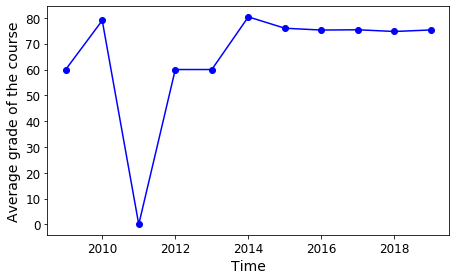

In [53]:
#总结，做出图像，其中理念的数据均不符合标准正态分布，故不分析其信度
time=range(2009,2020)
plt.plot(time,averageGrades,'bo-')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time',fontsize=14)
plt.ylabel('Average grade of the course',fontsize=14)
fig = plt.gcf()
fig.set_size_inches(7.2, 4.2)
print()
fig.savefig(os.getcwd()+'\pictureCourseGrade.png', dpi=300)
plt.show()